## CUSTOMER SEGMENTATION & CLUSTERING ON MALL CUSTOMERS

### Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Loading and reading the data

In [96]:
cust = pd.read_csv(r"C:\Users\bradd\Documents\DATA SCIENCE\PROJECTS\Cutomer-Segmentation-Clustering\Mall_Customers.csv")
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Univariate Analysis

In [43]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

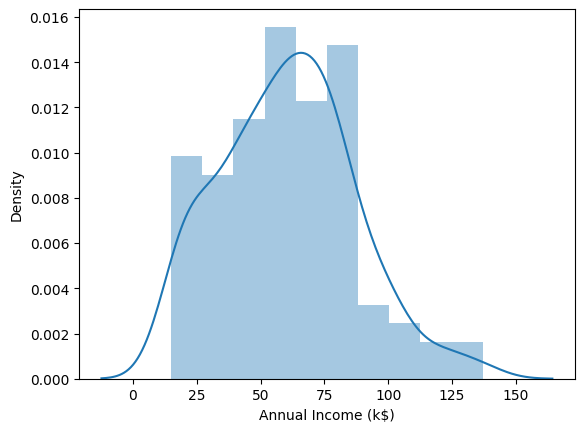

In [44]:
sns.distplot(cust['Annual Income (k$)'])

In [45]:
cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

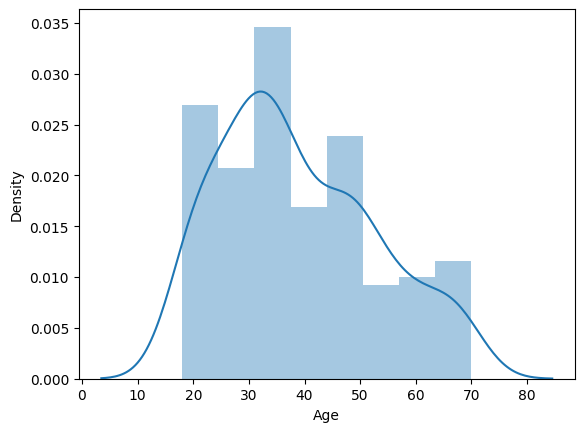

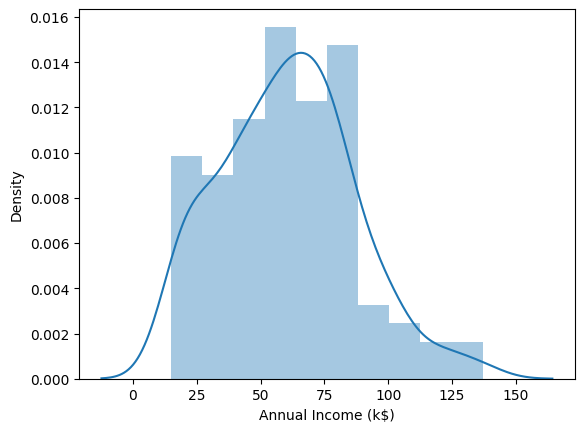

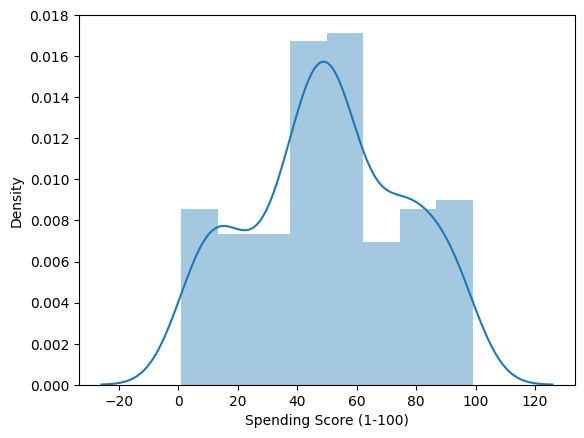

In [46]:
distcol = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in distcol:
    plt.figure()
    sns.distplot(cust[i])

<Figure size 640x480 with 0 Axes>

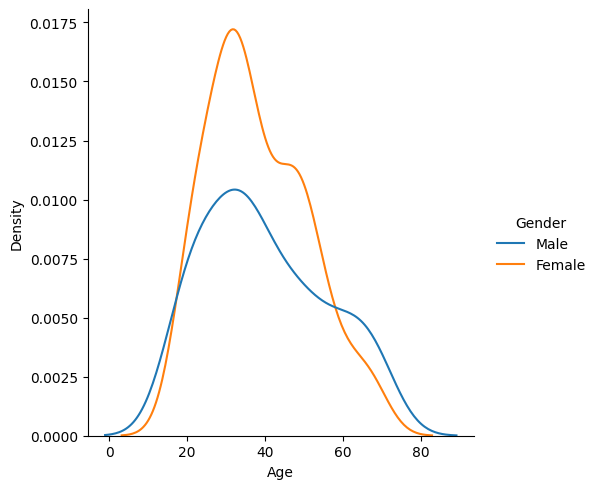

<Figure size 640x480 with 0 Axes>

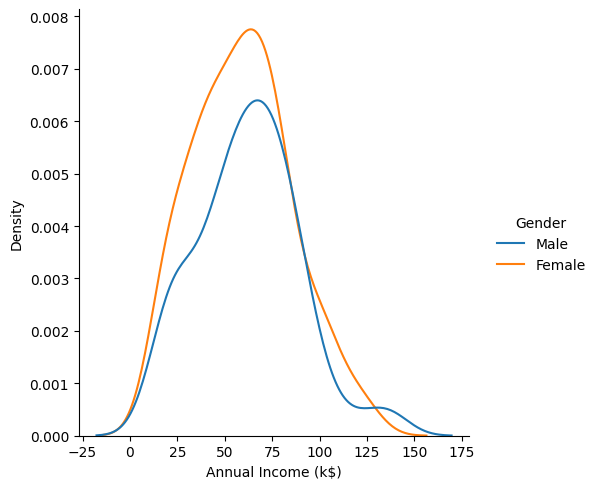

<Figure size 640x480 with 0 Axes>

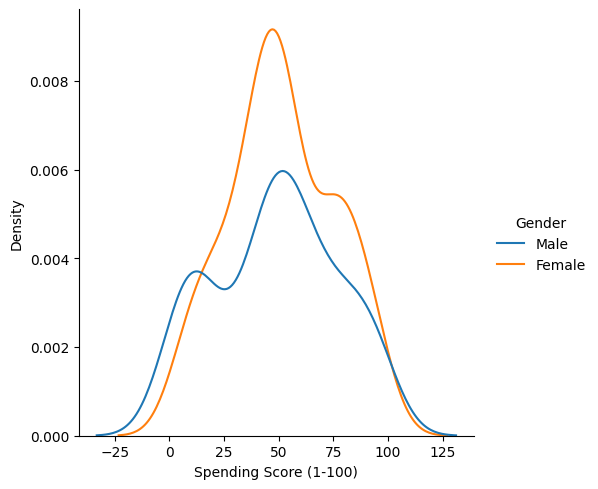

In [47]:
##melt_df = pd.melt(cust, value_vars=['Male', 'Female'], var_name='melt')
distcol = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in distcol:
    plt.figure()
    sns.displot(cust, x=i,kind='kde',  hue = cust['Gender'])

Observation  
Age  
 From the above charts, most of the mall customers, both male and female are aged around 36-38 years.
 The distribution also indicates that most are aged below 40 years.

 Annual Income  
  Most mall customers earn between 50k and 75k while largest number of customers are those earning above 50k and hence a positive spending potential.
  When we combine both age and income distribution, a great number of those aged below 40years earn more than 60k which supports the positive spending potential.  

 Spending Score  
  The distribution is concentrated around the 50 spending score while most of the values lie above 50. This shows the mall customers are spending a great deal which is good to the mall business. 
 




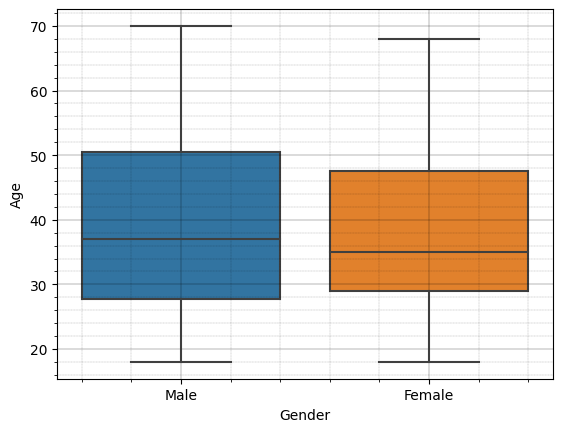

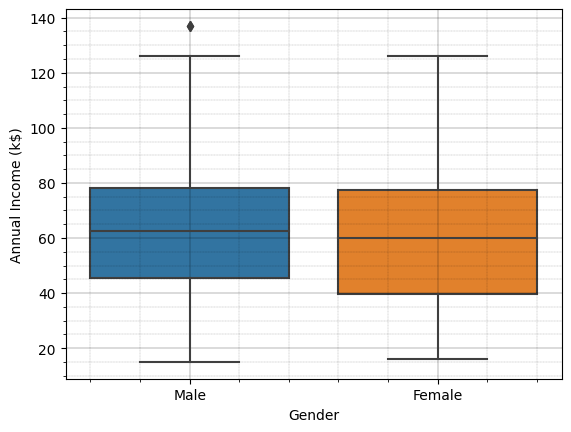

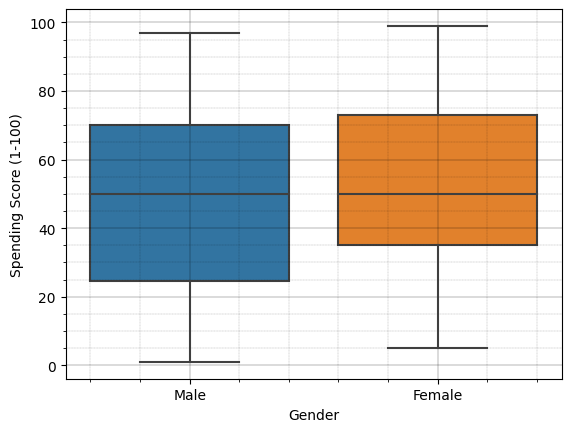

In [48]:
# Boxplots

distcol = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in distcol:
    fig,ax=plt.subplots()
    sns.boxplot(data=cust, x='Gender', y=i)
    ax.minorticks_on()
    ax.grid(which='major',linestyle='-',linewidth='0.2',color='black')
    ax.grid(which='minor',linestyle=':',linewidth='0.2',color='black')

In [49]:
#Percentage of Female to Male Mall Customers
cust['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

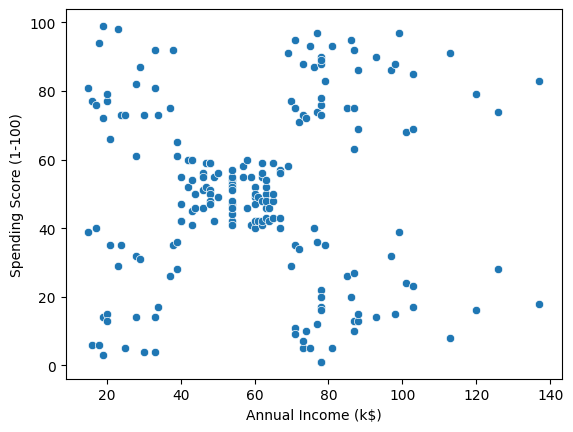

In [50]:
sns.scatterplot(data=cust,x='Annual Income (k$)',y='Spending Score (1-100)')

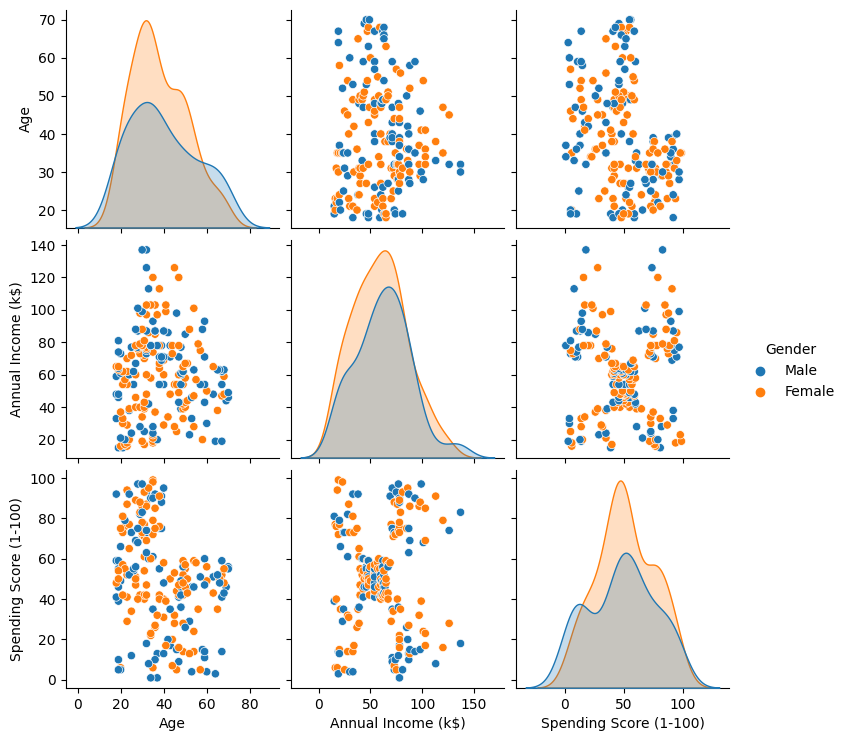

In [51]:
cust = cust.drop('CustomerID', axis=1)
sns.pairplot(cust, hue='Gender')

In [52]:
cust.groupby(['Gender']).agg({'Age':'mean','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'})

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [53]:
corcol=cust.drop(['Gender'], axis=1)
corcol.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

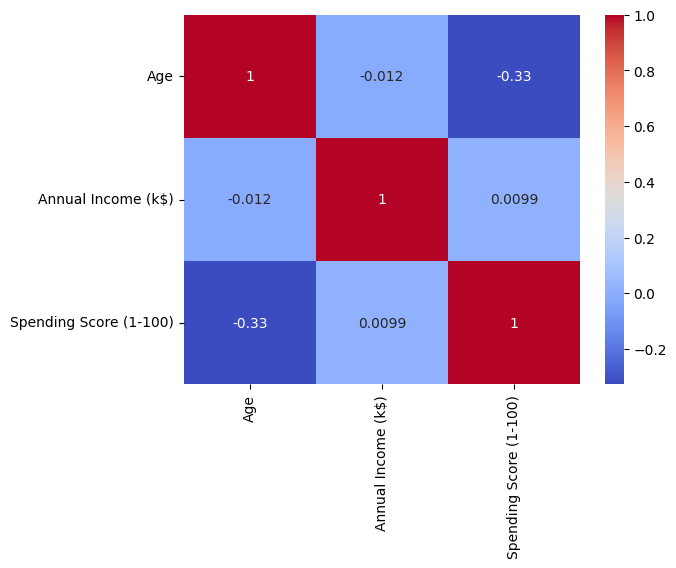

In [54]:
sns.heatmap(corcol.corr(),annot=True,cmap='coolwarm')

### Clustering - Univariate, Bivariate, Multivariate

#### Univariate Clustering

In [13]:
# Creating an instance 
clust1 = KMeans(n_clusters=4)

In [14]:
# Fitting the instance on the data
clust1.fit(cust[['Annual Income (k$)']])

KMeans(n_clusters=4)

In [15]:
# Unique clusters generated
pd.unique(clust1.labels_)

array([2, 1, 0, 3])

In [17]:
# Adding the labels to the data
cust['Income Cluster'] = clust1.labels_
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [18]:
# Number of customers in each label/cluster
cust['Income Cluster'].value_counts().sort_values(ascending=True)

Income Cluster
3    20
2    50
0    62
1    68
Name: count, dtype: int64

In [19]:
#Distance between data points and centroid
clust1.inertia_

13278.112713472483

Text(0, 0.5, 'Inertia')

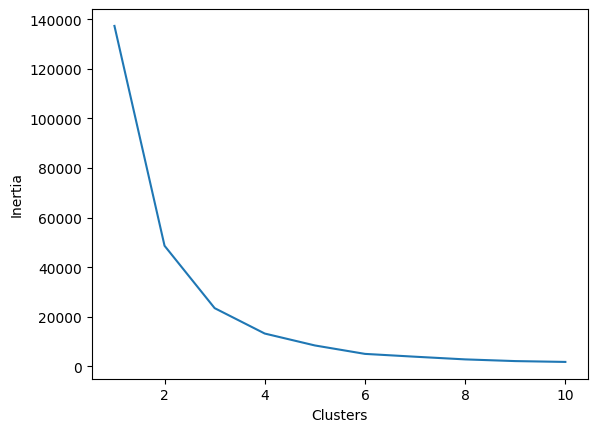

In [20]:
#Finding the optimum number of clusters
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(cust[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

#Plotting the elbow 
plt.plot(range(1,11), inertia_scores)
plt.xlabel('Clusters')
plt.ylabel('Inertia')


We choose 4 clusters.  
We choose number of clusters from the point when the curve is starting to flatten.  
Based on this, I will re-ru the previous codes with 4 clusters.

In [21]:
cust.groupby('Income Cluster').agg({'Age':'mean','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'})

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.838710,77.806452,50.403226
1,43.970588,54.764706,50.014706
2,35.280000,27.400000,49.480000
3,36.600000,109.700000,52.000000


#### Bivariate Clustering

In [116]:
# Creating an instance 
clust2 = KMeans(n_clusters=5)
clust2.fit(cust[['Annual Income (k$)','Spending Score (1-100)']])
cust['Spending & Income Cluster'] = clust2.labels_
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending & Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


Text(0, 0.5, 'Inertia')

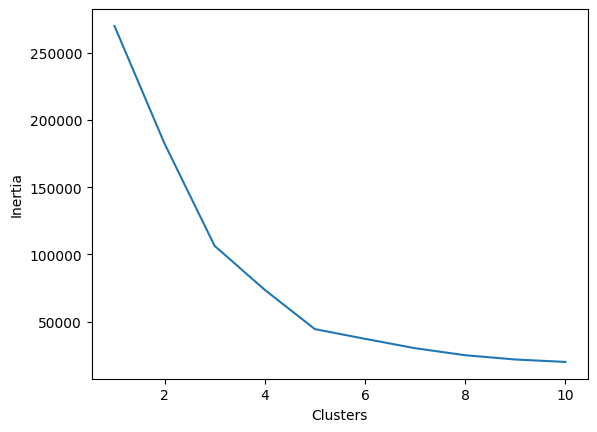

In [117]:
#Finding the optimum number of clusters
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(cust[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

#Plotting the elbow 
plt.plot(range(1,11), inertia_scores2)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Obseravtion  
The optimum clusters are 5.  
We will re-run the code with 5 clusters.

In [118]:
# Centroids
clust2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [119]:
# Creating DataFrame out of Centroids
centroids_df = pd.DataFrame(clust2.cluster_centers_).rename(columns={0:'x', 1:'y'})
centroids_df.head()

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,26.304348,20.913043
4,88.200000,17.114286


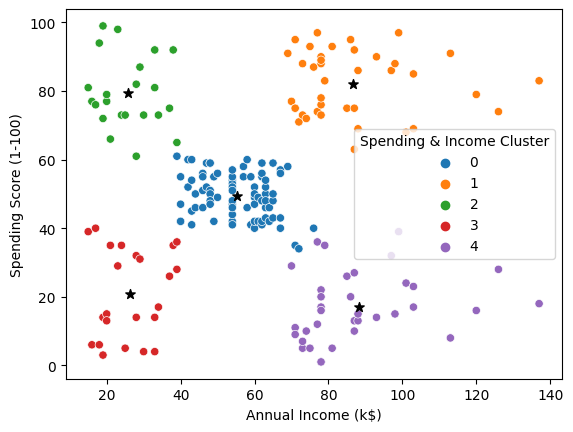

In [120]:
# Plotting clusters with their respective centroids
sns.scatterplot(data=cust, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending & Income Cluster', palette='tab10')
plt.scatter(x=centroids_df['x'], y=centroids_df['y'], marker='*', color='black', s=50)
plt.savefig('Clusters Image.png')

In [35]:
cust.groupby('Spending & Income Cluster').agg({'Age':'mean','Annual Income (k$)':'mean','Spending Score (1-100)':'mean'})

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


In [45]:
pd.crosstab(cust['Spending & Income Cluster'], cust['Gender'],normalize='index')

Gender,Female,Male
Spending & Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.592593,0.407407
4,0.608696,0.391304


Observations.  
 From the scatter plots, our target cluster will be cluster 1 since it has the characteristics of high  
 spending score and high income.
 In this cluster, we see that the average age is 33 years, an annual income of USD 87k and a spending score of 82.
 The cluster is also composed of 54% female and 46% male customers.


#### Multivariate Clustering

In [74]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender En
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [52]:
# We will do some preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [84]:
# Initialize the scaler
scaler = StandardScaler()

In [105]:
# Encoding the Gender column for 1 to represent Male and 0 to represent Female and then 
# drp CustomerID
cust_en = pd.get_dummies(cust, drop_first=True).astype(int)
cust_en.drop('CustomerID', axis=1, inplace=True)
cust_en.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [112]:
# Scale the data and then turn it into a DataFrame
cust_en = pd.DataFrame(scaler.fit_transform(cust_en))
cust_en.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Text(0, 0.5, 'Inertia')

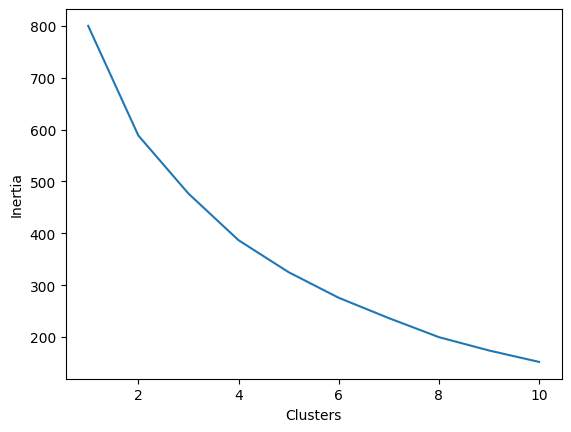

In [114]:
#Finding the optimum number of clusters
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(cust_en)
    inertia_scores3.append(kmeans3.inertia_)

#Plotting the elbow 
plt.plot(range(1,11), inertia_scores3)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Observation.  
The data is clustered into 4.

### Final Analysis  
<img src = "C:\Users\bradd\Documents\DATA SCIENCE\PROJECTS\Cutomer-Segmentation-Clustering\Clusters Image.png" width="800" height="400">

#### Target Cluster

 Our target cluster will be cluster 1 since it has the characteristics of high  
 spending score and high income.  
 In this cluster, we see that the average age is 33 years, an annual income of USD 87k and a spending score of 82.  
 The cluster is also composed of 54% female and 46% male customers.  
 A marketing campaign on popular items in this cluster would be ideal.  

 Cluster 2 is good for sales events of popular items.  

 On Cluster 4 with high income, the Mall should carry out a research on these customers and find if the spending score is low due to  
 lack of their target products or some other reasons.
